## Imports & Load dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
ipl_df = pd.read_csv('ipl_ball_by_ball_data.csv')

## Sneak peak into the data: 

In [3]:
ipl_df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [5]:
ipl_df.innings.unique()

array([1, 2, 4, 3, 5, 6])

In [6]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [7]:
ipl_df.innings.unique()

array([1, 2])

## Additional Colums:

In [8]:
# 1. total runs in each ball
# 2. is there a wicket fall in that ball

In [9]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [10]:
# ipl_df.head(20)

In [11]:
type(ipl_df.player_dismissed[11])

str

In [12]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [13]:
# ipl_df.head(15)

## Choose Teams:

In [14]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058) 

t1 = 'Mumbai Indians'
t2 = 'Royal Challengers Bangalore'

## Choose a Match b/w these Teams:

In [15]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 335985,  392208,  392218,  419119,  419157,  419162,  548360,
        598033,  729287,  733983,  829737, 1136574, 1175362, 1254058])

In [16]:
matchID = 1254058

In [18]:
mdf = ipl_df[ipl_df.match_id == matchID]

In [19]:
# mdf.head()

In [20]:
mdf.reset_index(inplace = True, drop = True)

In [21]:
# mdf.head()

In [22]:
df1 = mdf[mdf.innings == 1] 
df2 = mdf[mdf.innings == 2] 

## Outcomes:

In [23]:
# 0, 1, 2, 3, 4, 5, 6, 7, 'W', 'extras'
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [24]:
ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()

1    10347
0    9050 
4    2932 
2    1575 
6    1270 
3    92   
5    47   
7    7    
Name: total_runs, dtype: int64

In [25]:
ipl_df[ipl_df.batting_team == t1].isOut.sum()

1237

In [26]:
t1_outcomes_count = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes_count = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [27]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [28]:
t1_outcomes = []
t2_outcomes = []

for outcome in outcomes:
    if outcome != 'w':
        t1_outcomes.append(t1_outcomes_count[outcome])
        t2_outcomes.append(t2_outcomes_count[outcome])
    else:
        t1_outcomes.append(t1_outs)
        t2_outcomes.append(t2_outs)

In [29]:
t1_outcomes, t2_outcomes

([9050, 10347, 1575, 92, 2932, 1270, 1237],
 [8277, 9698, 1570, 73, 2659, 1227, 1158])

In [30]:
t1_pb_outcomes = [i/sum(t1_outcomes) for i in t1_outcomes]
t2_pb_outcomes = [i/sum(t2_outcomes) for i in t2_outcomes]

In [31]:
t1_pb_outcomes

[0.3414707768931819,
 0.3904086329849451,
 0.05942723465268083,
 0.0034713051352677055,
 0.11062898539787948,
 0.04791910349771724,
 0.046673961438327735]

In [32]:
# (0 --> 1)
# ex: 
# dot - 34%
# ones - 34% + 39% = 73%

In [33]:
t1_pb_ls = np.cumsum(t1_pb_outcomes)
t2_pb_ls = np.cumsum(t2_pb_outcomes)

In [34]:
t1_pb_ls, t2_pb_ls

(array([0.34147078, 0.73187941, 0.79130664, 0.79477795, 0.90540694,
        0.95332604, 1.        ]),
 array([0.33561755, 0.72885411, 0.7925148 , 0.79547482, 0.90329251,
        0.95304517, 1.        ]))

In [35]:
np.random.random()

0.6452610471656725

In [36]:
# run it for 120 balls & determine runs

pred_runs = 0
pred_wks = 0
balls = 120

i1p_0 = t1_pb_ls[0]
i1p_1 = t1_pb_ls[1]
i1p_2 = t1_pb_ls[2]
i1p_3 = t1_pb_ls[3]
i1p_4 = t1_pb_ls[4]
i1p_6 = t1_pb_ls[5]
i1p_w = t1_pb_ls[6]

i2p_0 = t2_pb_ls[0]
i2p_1 = t2_pb_ls[1]
i2p_2 = t2_pb_ls[2]
i2p_3 = t2_pb_ls[3]
i2p_4 = t2_pb_ls[4]
i2p_6 = t2_pb_ls[5]
i2p_w = t2_pb_ls[6]

for i in range(balls):
    r_value = np.random.random()
    
    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1   
        
        if pred_wks == 10:
            break

In [37]:
pred_runs, pred_wks

(190, 4)

In [38]:
# 100/1 after 10 overs, runs prediction?

In [39]:
ipl_df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0


In [40]:
over_ball = 19.5

over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

print(over_no*6 + ball_no)

119


## Function: 1st Innings runs prediction 

In [41]:
def innings_1_runs(curr_score, curr_wickets, curr_overs):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)

    i1p_0 = t1_pb_ls[0]
    i1p_1 = t1_pb_ls[1]
    i1p_2 = t1_pb_ls[2]
    i1p_3 = t1_pb_ls[3]
    i1p_4 = t1_pb_ls[4]
    i1p_6 = t1_pb_ls[5]
    i1p_w = t1_pb_ls[6]

    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
                
    return pred_runs

In [42]:
# innings_1_runs(curr_score, curr_wickets, curr_overs)
innings_1_runs(140, 9, 15.0)

146

## Function: 2nd Innings runs prediction 

In [43]:
def innings_2_runs(curr_score, curr_wickets, curr_overs, target):
    # initialize
    pred_runs = curr_score
    pred_wks = curr_wickets
    over_ball = curr_overs

    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])

    leftover_balls = 120 - (over_no*6 + ball_no)

    i2p_0 = t2_pb_ls[0]
    i2p_1 = t2_pb_ls[1]
    i2p_2 = t2_pb_ls[2]
    i2p_3 = t2_pb_ls[3]
    i2p_4 = t2_pb_ls[4]
    i2p_6 = t2_pb_ls[5]
    i2p_w = t2_pb_ls[6]

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1   

            if pred_wks == 10:
                break
        if pred_runs > target:
            break
                
    return pred_runs

In [44]:
# innings_2_runs(curr_score, curr_wickets, curr_overs, target)
innings_2_runs(140, 4, 19.0, 150)

143

In [46]:
df_ing1 = mdf[mdf.innings == 1] 
df_ing2 = mdf[mdf.innings == 2] 

In [47]:
df_ing2.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.4,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [48]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [49]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

## Runs prediction: 1st Innings

In [50]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_wickets += df_ing1.isOut[i]
    curr_overs = df_ing1.ball[i]
    
    prediction = innings_1_runs(curr_score, curr_wickets, curr_overs)
    ing1_runs_pred.append(prediction)

In [51]:
# ing1_runs_pred

In [52]:
sum(df_ing1.total_runs)

159

In [53]:
actual_score = sum(df_ing1.total_runs)

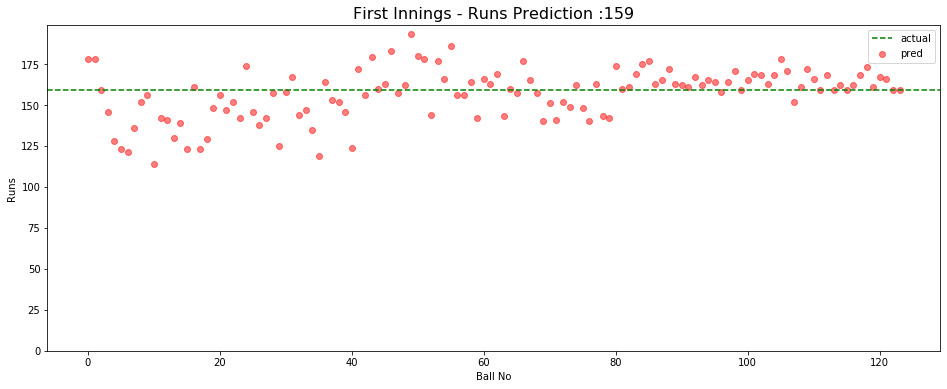

In [54]:
x_values = [i for i in range(len(df_ing1))]
y_values = ing1_runs_pred

plt.figure(figsize = (16, 6))
plt.scatter(x_values, y_values, color = 'r', alpha = 0.5, label = 'pred')
plt.axhline(actual_score, ls = '--', color = 'g', label = 'actual')
plt.ylim(0, actual_score + 40 )
plt.title('First Innings - Runs Prediction :'+ str(actual_score), fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [55]:
error_ing1_ls = [abs(i - actual_score) for i in ing1_runs_pred]

In [56]:
np.mean(error_ing1_ls)

11.806451612903226

## Runs prediction: 2nd Innings

In [57]:
# define target as ing 1 actual score
ing1_actual_score = actual_score 
target = ing1_actual_score

curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_score, curr_wickets, curr_overs, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

In [58]:
ing2_actual_score = sum(df_ing2.total_runs)

## Runs prediction chart: 2nd Innings

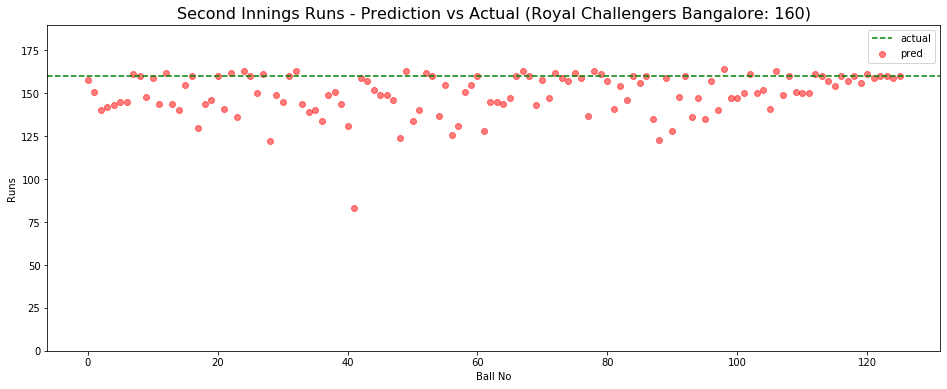

In [59]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

### Error in 2nd Innings runs:

In [60]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

10.801587301587302

## Win predictions: 1st Innings

In [61]:
# initialize win/tie/lose - w.r.t chasing team
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
        ing1_runs_prediction = innings_1_runs(ing1_curr_score, ing1_curr_wickets, ing1_curr_overs)
        target = ing1_runs_prediction
        
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [62]:
# tie_count_ls

## Win predictions: 2nd Innings

In [63]:
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0
target = ing1_actual_score

# each ball
for i in range(len(df_ing2)):
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # 100 iterations: (ex: 43% wins, 17% tie, 40% lose)
    for j in range(100):   
                
        ing2_runs_prediction = innings_2_runs(ing2_curr_score, ing2_curr_wickets, ing2_curr_overs, target)
        
        if ing2_runs_prediction > target:
            win_count += 1
        elif ing2_runs_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

In [64]:
len(win_count_ls), len(tie_count_ls), len(lose_count_ls)

(250, 250, 250)

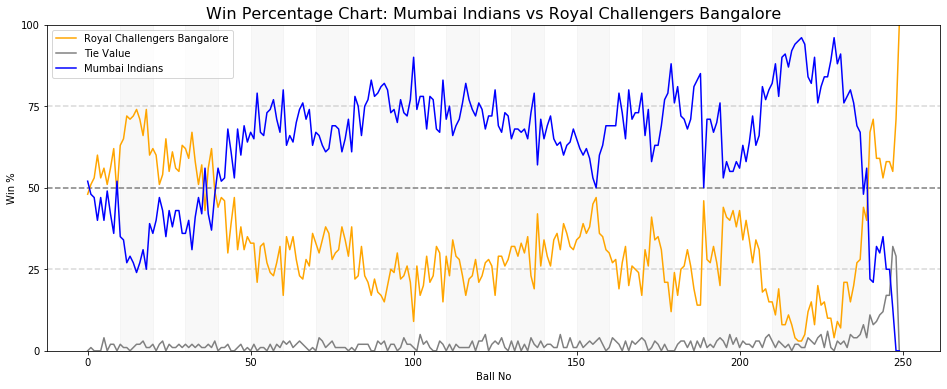

In [65]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()